step-size: 0.010000
qmax: 8.000000
noise: 0.000000
step-size: 0.100000
qmax: 8.000000
noise: 0.000000


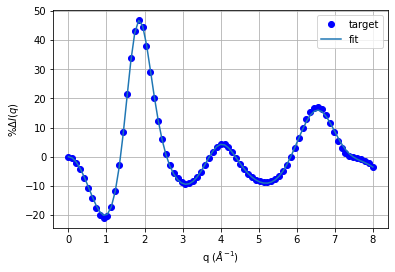

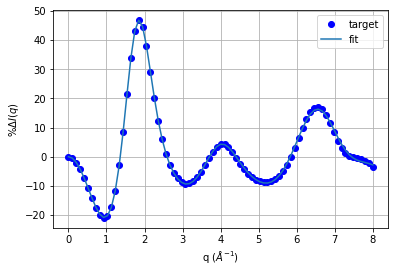

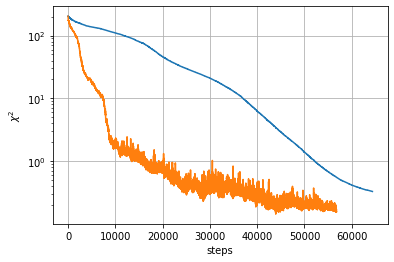

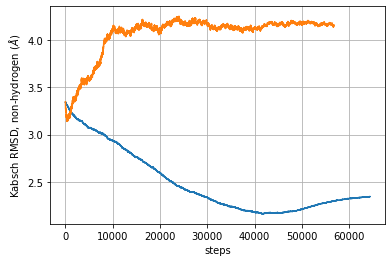

In [3]:
import numpy as np
import matplotlib.pyplot as p

title = 'chd'
plot_bool = True
png_plot = False

stepsize_list=(0.01, 0.1)
qmax_list=(4.0, 8.0)
noise_list=(0.0, 0.1)

#stepsize_list=[0.01]
qmax_list=[8.0]
noise_list=[0.0]

for ss in stepsize_list:
    for qq in qmax_list:
        for nn in noise_list:
            print('step-size: %f' % ss)
            print('qmax: %f' % qq)
            print('noise: %f' % nn)
            data_file = ('chd_data/data_chd_stepsize_%3.2f_qmax_%2.1f_noise_%3.2f.npz' 
                        % (ss, qq, nn))
            f = np.load(data_file)
            target_pcd = f['target_pcd']
            chi2_path = f['chi2_path']
            rmsd_path = f['rmsd_path']
            final_pcd = f['final_pcd']
            final_xyz = f['final_xyz']
            counts_array = f['counts']
            step_size = f['step_size']
            noise_factor = f['noise_factor']
            qvector = f['qvector']
            qmax = qvector[-1]
            nruns = f['nruns']

            if plot_bool:
                # chi2 plot
                p.figure(1)
                p.semilogy(chi2_path)
                # RMSD plot
                p.figure(2)
                p.plot(rmsd_path)                   
                # pcd plot
                p.figure()
                p.plot(qvector, target_pcd, 'bo')
                p.plot(qvector, final_pcd)
                p.xlabel('q $(\AA^{-1})$')
                p.ylabel('%$\Delta I(q)$')
                p.legend(('target', 'fit'))
                p.grid()

p.figure(1)
p.grid()
p.xlabel('steps')
p.ylabel('$\chi^2$')
if png_plot:
    fname = ('%s_chi2_stepsize_%3.2f_qmax_%2.1f_noise_%3.2f.png' % 
          (title, step_size, qmax, noise_factor))
    p.savefig(fname, dpi=300, facecolor='w', 
            edgecolor='w', orientation='portrait', 
            format='png', transparent=False, 
            bbox_inches='tight', pad_inches=0.1, 
            metadata=None)
p.figure(2)
p.grid()
p.xlabel('steps')
p.ylabel(r'Kabsch RMSD, non-hydrogen $(\AA)$')
if png_plot:
    fname = '%s_rmsd_stepsize_%3.2f_qmax_%2.1f_noise_%3.2f.png'
    p.savefig(fname, dpi=300, facecolor='w', 
        edgecolor='w', orientation='portrait', 
        format='png', transparent=False, 
        bbox_inches='tight', pad_inches=0.1, 
        metadata=None)

In [2]:
import numpy as np

f = np.load('chd_data/data_chd_stepsize_0.01_qmax_4.0_noise_0.00.npz')
f.files
print(f['final_xyz'])

[[ 0.33194237 -1.72815955  0.1868824 ]
 [ 0.97008627  0.67327649  0.09868205]
 [ 0.79607907  2.03908271 -0.0860374 ]
 [-0.16079626  1.13172447  0.06716642]
 [-1.01583509  0.2478809   0.03950013]
 [-0.92066988 -2.16925848 -0.18904564]
 [ 1.01315169 -2.305289    1.32108458]
 [ 1.715251   -3.57691004 -0.32595771]
 [ 2.00045724  1.38669164 -0.08435534]
 [ 1.47416641  2.89274831 -0.45577053]
 [-0.93359939  2.06564204  0.59124484]
 [-2.09173471  2.49720525  0.31835509]
 [-1.7079807  -2.81552465 -1.07162353]
 [-1.50166348 -3.09772861  0.56287518]]
